# Dragon Real Estate Price-Predictor


In [86]:
import pandas as pd

In [87]:
housing = pd.read_csv("Data.csv")

In [88]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [89]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [90]:
housing['CHAS'].value_counts()

CHAS
0.0    452
1.0     34
Name: count, dtype: int64

In [91]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,501.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.286124,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.703931,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885000,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.209000,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.625000,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [92]:
%matplotline inline

UsageError: Line magic function `%matplotline` not found.


In [ ]:
#  For` Plotting Histogram`
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [94]:
# for learning purpose
import numpy as np


def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [95]:
train_set, test_set = split_train_test(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [96]:
 print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [97]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
# for train_index, test_index in split.split(housing, housing['CHAS']):
#     strat_train_set = housing.loc[train_index]
#     strat_test_set = housing.loc[test_index]
from sklearn.model_selection import StratifiedShuffleSplit

# Clean stratification column
housing['CHAS'] = housing['CHAS'].fillna(0).astype(int)

# Check balance
print(housing['CHAS'].value_counts())

split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)

for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]


CHAS
0    472
1     34
Name: count, dtype: int64


In [98]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 341 to 219
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     95 non-null     float64
 1   ZN       100 non-null    float64
 2   INDUS    98 non-null     float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       99 non-null     float64
 6   AGE      96 non-null     float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    99 non-null     float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [ ]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,95.000000,100.000000,98.000000,102.000000,102.000000,99.000000,96.000000,102.000000,102.000000,102.000000,102.000000,102.000000,99.000000,102.000000
mean,2.782644,12.545000,10.278061,0.068627,0.542488,6.305364,64.151042,3.990251,8.774510,395.156863,18.322549,368.333039,12.042121,22.667647
std,5.538999,24.847524,6.943674,0.254068,0.113625,0.706966,29.275037,2.145078,8.643554,170.102517,2.285075,73.937923,6.908122,8.930670
min,0.010960,0.000000,0.460000,0.000000,0.389000,4.138000,6.500000,1.174200,1.000000,188.000000,12.600000,2.520000,1.920000,5.600000
25%,0.054345,0.000000,4.882500,0.000000,0.445500,5.957500,33.950000,2.230125,4.000000,273.000000,16.650000,376.797500,7.105000,18.675000
50%,0.178990,0.000000,7.225000,0.000000,0.515000,6.193000,73.300000,3.398100,5.000000,307.000000,18.700000,392.995000,9.930000,21.700000
75%,1.817025,20.000000,18.100000,0.000000,0.614000,6.623000,91.275000,5.609225,8.000000,616.750000,20.200000,396.900000,15.435000,26.625000
max,25.046100,80.000000,27.740000,1.000000,0.871000,8.398000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,34.770000,50.000000


In [99]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [100]:
strat_train_set['CHAS'].value_counts()

CHAS
0    377
1     27
Name: count, dtype: int64

In [ ]:
95/7

13.571428571428571

In [ ]:
377/27

13.962962962962964

In [101]:
housing = strat_train_set.copy()

## Looking for Correlations

In [102]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix['MEDV'].sort_values(ascending=False)# strong positive correlation.

MEDV       1.000000
RM         0.670135
ZN         0.391844
B          0.352618
DIS        0.255649
CHAS       0.180458
RAD       -0.365016
CRIM      -0.382804
AGE       -0.421495
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.491957
LSTAT     -0.732270
Name: MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

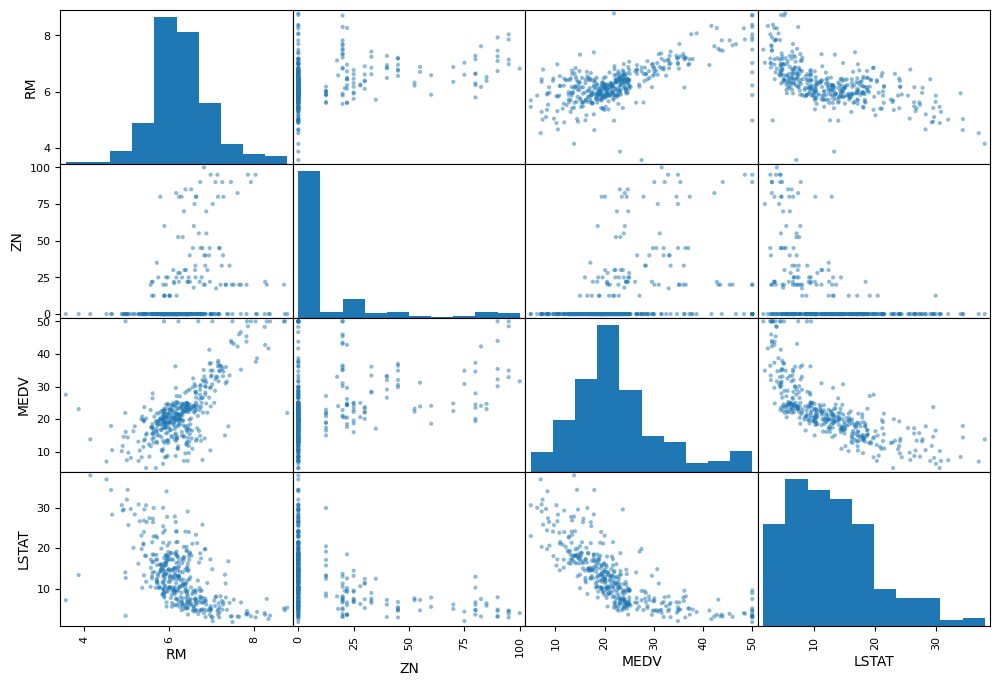

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["RM","ZN", "MEDV", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

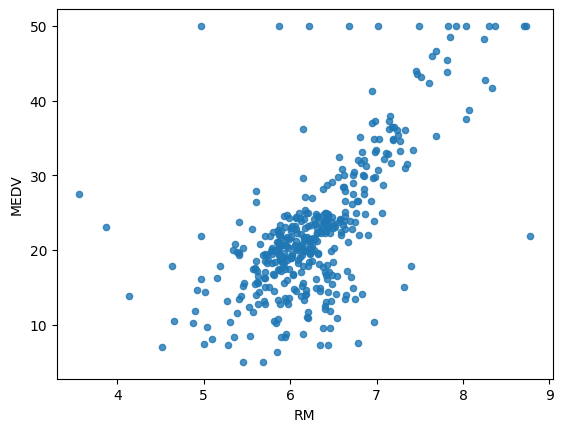

In [ ]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.8)

## Trying out Attribute combinations

In [103]:
housing["TAXRM"] = housing["TAX"] / housing["RM"]


In [104]:
housing["TAXRM"]

425    112.957938
318     47.633971
41      34.416544
316     51.403449
431     97.468169
          ...    
100     57.083395
346     59.681248
484    113.438937
304     30.679934
392    132.247816
Name: TAXRM, Length: 404, dtype: float64

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,8.3,112.957938
318,0.40202,0.0,9.90,0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,23.1,47.633971
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6,34.416544
316,0.31827,0.0,9.90,0,0.544,5.914,NaN,3.9986,4,304,18.4,390.70,18.33,17.8,51.403449
431,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,14.1,97.468169


In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.670135
ZN         0.391844
B          0.352618
DIS        0.255649
CHAS       0.180458
RAD       -0.365016
CRIM      -0.382804
AGE       -0.421495
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.491957
TAXRM     -0.523075
LSTAT     -0.732270
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

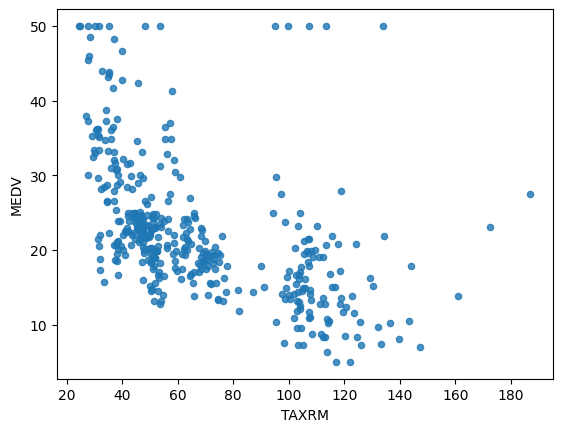

In [173]:
housing.plot(kind = "scatter", x="TAXRM", y = "MEDV", alpha = 0.8)


In [174]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [ ]:
# To take care of missing attributes, you have three options:
    # 1. Get rid of the data missing data points
    # 2. Get rid of the whole attributes
    # 3. Set the value to the some value(0, mean or median)

In [175]:
a = housing.dropna(subset = ["RM"]) #Option01
a.shape

(402, 13)

In [105]:
housing.drop("RM", axis=1).shape #Option02
# Note that there is no RM column and also note that the housing dataframe will remain unchanged.


(404, 14)

In [106]:
median = housing["RM"].median() #compute median for option 03.

In [107]:
median

np.float64(6.209)

In [176]:
housing["RM"].fillna(median) # option03
# Note that the original dataframe will remain unchanged.

425    5.896
318    6.382
41     6.770
316    5.914
431    6.833
       ...  
100    6.727
346    5.898
484    5.871
304    7.236
392    5.036
Name: RM, Length: 404, dtype: float64

In [ ]:
housing.shape

(404, 13)

In [ ]:
housing.describe() # before we started filling missing attributes.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,391.000000,386.000000,388.000000,404.000000,404.000000,402.000000,390.000000,404.000000,404.000000,404.000000,404.000000,404.000000,387.000000
mean,3.813349,10.866580,11.287552,0.066832,0.557777,6.281386,69.593590,3.745757,9.745050,411.539604,18.489109,353.730421,12.887674
std,9.325328,23.017096,6.802350,0.250040,0.116376,0.703985,27.609431,2.095471,8.723025,168.190814,2.135190,95.032131,7.216492
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.089470,0.000000,5.190000,0.000000,0.453000,5.878250,46.400000,2.042200,4.000000,283.250000,17.400000,374.650000,7.130000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.740000
75%,3.675945,12.500000,18.100000,0.000000,0.625750,6.623500,94.250000,5.100400,24.000000,666.000000,20.200000,395.945000,17.115000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [177]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing)


,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [ ]:
imputer.statistics_

array([2.83920e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.77500e+01, 3.10730e+00, 5.00000e+00, 3.41000e+02,
       1.91000e+01, 3.90975e+02, 1.17400e+01])

In [109]:
imputer.statistics_.shape

(15,)

In [178]:
x = imputer.transform(housing)

In [179]:
housing_tr = pd.DataFrame(x, columns = housing.columns)

In [ ]:
housing_tr.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.699779,10.382426,11.232599,0.066832,0.557777,6.281027,69.876238,3.745757,9.745050,411.539604,18.489109,353.730421,12.839381
std,9.194859,22.608913,6.671452,0.250040,0.116376,0.702254,27.166717,2.095471,8.723025,168.190814,2.135190,95.032131,7.066410
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.091487,0.000000,5.725000,0.000000,0.453000,5.878750,47.350000,2.042200,4.000000,283.250000,17.400000,374.650000,7.215000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.107300,5.000000,341.000000,19.100000,390.975000,11.740000
75%,3.489463,0.000000,18.100000,0.000000,0.625750,6.620500,94.025000,5.100400,24.000000,666.000000,20.200000,395.945000,16.945000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-learn Design

In [ ]:
# Primarily, three types of objects1
# 1. Estimators- It estimates some parameter based on a dataset(imputer)
# It has a fit method and transform method.
# 2. Transformer- Transform method takes input and returns output based on learning fit.
# 3. Predictors- LinearRegression Model is an example of predictor.
# It also gives score function which will evaluate the predictions.


## Feature Scaling

primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
  (value-min)/(max-min)
  sklearn provides a class called MinMaxscaler for this.
2. Standardization
 (value-mean)/std
 sklearn provides a class standardscaler for this.
   

## Creating pipeline.

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    #...... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [181]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [112]:
housing_num_tr.shape

(404, 13)

## selecting a desired model for Dragon Real Estates

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model = LinearRegression()
model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [183]:
print(housing_num_tr.shape)   # (404, n_features)
print(housing_labels.shape)  # (404,)


(404, 13)
(404,)


In [184]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num_tr = imputer.fit_transform(housing_num_tr)


In [185]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [186]:
prepared_data = my_pipeline.fit_transform(some_data)

In [187]:
model.predict(prepared_data)

array([ 7.4, 22. , 34.9, 16.6, 14.1])

In [147]:
list(some_labels)

[8.3, 23.1, 26.6, 17.8, 14.1]

# Evaluating the Model

In [148]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)


In [149]:
rmse

np.float64(0.0)

##using better evaluation technique - Cross Validation

In [150]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [151]:
rmse_scores

array([7.0513275 , 6.56413017, 5.37922834, 5.28815981, 7.42751641,
       3.88825154, 5.35702809, 5.56127234, 5.1120446 , 4.43269106])

In [153]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.mean())

In [155]:
print_scores(rmse_scores)

scores: [7.0513275  6.56413017 5.37922834 5.28815981 7.42751641 3.88825154
 5.35702809 5.56127234 5.1120446  4.43269106]
Mean:  5.606164984998328
Standard deviation:  5.606164984998328


 Quiz: convert this notebook into a python file and run the pipeline using visual studio code

## Saving the Model

In [159]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the Model on test data

In [191]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.fit_transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[32.2  5.  22.8 31.6 22.4 14.8 22.4  9.6 32.2 25.1 19.8 10.5 20.4  8.5
 20.6  7.2 34.7 13.3 20.1 28.2 19.6 18.8 10.4 29.1 16.1 22.2 16.7 22.
  7.  32.2 24.5 20.6 21.7 10.9 19.6 17.8 36.5 22.  21.2 17.2 18.3 43.1
 19.6 21.2 15.1 20.5 31.6 24.7 17.4 19.9 24.5 18.3 23.9 19.6 22.  22.2
 48.3 23.9 20.3 20.4 24.5  5.  24.3 38.7 19.1 28.7 50.  11.7 15.4 31.6
 50.  22.9 29.1 19.8 48.5 15.7 21.9 23.2 23.1 20.4 21.4 22.9 17.9 18.5
 24.7 21.2 14.1 22.2 18.4 20.4 18.4 27.9 12.1 21.7 16.7 37.  19.6 29.1
 12.7 25.3 20.5 18.5] [32.7, 13.1, 28.7, 26.7, 14.4, 15.6, 19.4, 12.6, 33.3, 32.4, 23.1, 13.8, 22.6, 11.9, 21.1, 11.3, 35.4, 13.5, 21.0, 27.5, 19.2, 19.5, 10.2, 29.4, 18.6, 24.8, 15.2, 24.4, 8.8, 30.3, 22.0, 20.6, 23.1, 13.3, 23.8, 13.8, 33.8, 24.7, 19.4, 20.9, 22.5, 48.8, 22.7, 23.4, 19.5, 26.4, 31.7, 19.0, 19.9, 18.2, 21.2, 13.6, 27.1, 21.7, 28.6, 24.0, 44.8, 31.1, 18.9, 20.4, 29.1, 5.6, 17.5, 39.8, 12.0, 33.2, 50.0, 20.1, 21.5, 28.5, 50.0, 22.0, 31.5, 22.6, 50.0, 7.0, 15.3, 21.9, 20.7, 23.1, 22.2

In [192]:
final_rmse

np.float64(3.92128430341837)

In [194]:
prepared_data[0]

array([ 1.62212051,  0.        ,  1.19029452,  0.        ,  1.59880356,
       -1.15281182,  0.79826709, -1.10636543,  1.22392284,  1.21337501,
        1.2033301 , -1.42837404,  1.26776332])